## Get InPlace Listings

In [ ]:
import pandas as pd
import requests

how to get cookies, headers and params

load up a listing on the inplace portal while having your browser's debug tools on the networking tab.
find the details xhr request and copy it as a cURL
go to https://curl.trillworks.com and paste it in to convert it to python
copy the 3 items needed

adjust properties as to your needs

In [ ]:
listings = []
start_num = 18000
end_num = 23000
cookies = {
    
}
headers = {
    
}
params = (
    
)
properties = [
    'opportunityId', 
    'title', 
    'description', 
    'agencyName', 
    'agencyAddress', 
    'placesAvailable', 
    'applicationInstructions', 
    'applicationRequirements', 
    'startDate', 'endDate', 
    'applicationStartDate', 
    'applicationEndDate', 
    'salaryAmountMin', 
    'salaryAmountMax', 
    'salaryCurrency'
]

In [ ]:
for i in range(start_num, end_num + 1):
    response = requests.get(
        'https://inplace.ntu.edu.sg/oppapi/student/opportunities/' + str(i) + '/detail', 
        headers=headers, 
        params=params, 
        cookies=cookies
    )
    print('Iteration:', i, ', Status: ', response.status_code)
    if response.status_code == 200:
        response_json = response.json()
        cleaned_json = {}

        for _property in properties:
            cleaned_json[_property] = response_json[_property]
        listings.append(cleaned_json)

In [ ]:
df = pd.DataFrame(listings)
df.head()

In [ ]:
df.to_csv('listing.csv')

## Data sci

In [6]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
sb.set()

In [3]:
df = pd.read_csv('listing.csv')
df.head()

,Unnamed: 0,opportunityId,title,description,agencyName,agencyAddress,placesAvailable,applicationInstructions,applicationRequirements,startDate,endDate,applicationStartDate,applicationEndDate,salaryAmountMin,salaryAmountMax,salaryCurrency
0,0,18469,Data & Front-End Developer Intern,Responsibilities:\nDevelop Hiverlab's business...,Hiverlab Pte Ltd,"1008/#04-12/14/15 / 1008 Toa Payoh North, 3189...",2,Please ensure that you attach a copy of your C...,NaN,2022-01-10T00:00:00,2022-05-28T23:59:00,2021-08-25T00:00:00,2021-08-31T23:59:00,NaN,NaN,NaN
1,1,18470,Unity Developer (Intern),Responsibilities:\nCollaborate closely with th...,Hiverlab Pte Ltd,"1008/#04-12/14/15 / 1008 Toa Payoh North, 3189...",2,Please ensure that you attach a copy of your C...,NaN,2022-01-10T00:00:00,2022-05-28T23:59:00,2021-08-25T00:00:00,2021-08-31T23:59:00,NaN,NaN,NaN
2,2,18471,Developing 3D Applications Solution for Machin...,To develop a software platform for 3D applicat...,Inspiraz Technology Pte Ltd,"Blk 19 Kallang Avenue #06-163, 339410, Singapore",2,Please ensure that you attach a copy of your C...,C/C++\nVisual Studio\nImage processing\nOpenCV...,2022-01-10T00:00:00,2022-05-28T23:59:00,2021-08-25T00:00:00,2021-08-31T23:59:00,1000.0,1000.0,SGD
3,3,18472,Real Time gigapixel camera software developmen...,"Incorporating image processing algorithms, ima...",DSO National Laboratories,"12 / 12 Science Park Drive, SINGAPORE, 118225,...",2,Please ensure that you attach a copy of your C...,Prerequisites:\n• Singaporeans only\n• CGPA of...,2022-01-10T00:00:00,2022-05-28T23:59:00,2021-08-25T00:00:00,2021-08-31T23:59:00,2000.0,2000.0,SGD
4,4,18473,Real Time embedded software development and te...,Develop embedded software framework for applic...,DSO National Laboratories,"12 / 12 Science Park Drive, SINGAPORE, 118225,...",1,Please ensure that you attach a copy of your C...,Prerequisites:\n• Singaporeans only\n• CGPA of...,2022-01-10T00:00:00,2022-05-28T23:59:00,2021-08-25T00:00:00,2021-08-31T23:59:00,2000.0,2000.0,SGD


In [10]:
salary = df['salaryAmountMax']
salary.head()

0       NaN
1       NaN
2    1000.0
3    2000.0
4    2000.0
Name: salaryAmountMax, dtype: float64

/Users/bhargav/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salaryAmountMax'>

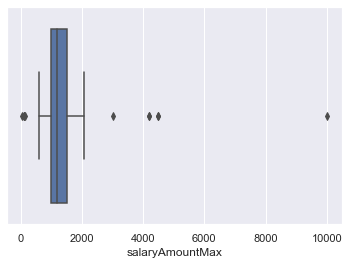

In [11]:
sb.boxplot(salary)

In [12]:
salary.describe()

count      961.000000
mean      1344.853278
std        504.409823
min         56.000000
25%       1000.000000
50%       1200.000000
75%       1500.000000
max      10000.000000
Name: salaryAmountMax, dtype: float64